 <br/>

# __대학별 평균 등록금__ #

>*대학의 학제, 설립, 지역 등에 따른 입학 정원과 평균 입학금, 평균 등록금을 알아보기 위한 데이터 분석*

 <br/>


---


* ## 사용된 데이터셋 ##
   *  #### 한국장학재단_대학별 평균등록금_20210430 ####
     *  매년 4월 대학정보공시 기준의 대학별 입학정원, 평균입학금, 평균등록금을 확인할 수 있음
     *  국공립대는 이미 2018년부터 입학금을 폐지, 사립대와 전문대는 2022년까지 단계적 폐지 예정
     *  분교, 캠퍼스는 본교에 통합 산출


 <br/>


---

 <br/>
 <br/>
 <br/>
 <br/>
 <br/>




> **구글 드라이브에서 데이터셋 불러오기**







In [268]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [269]:
# 데이터셋 경로를 변수에 저장
data1 = "/content/drive/MyDrive/공공데이터/완료/한국장학재단_대학별 평균등록금_20210430.csv"

 <br/>
  <br/>
   <br/>



> 라이브러리 불러오기



In [270]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform

# 경고 메세지 출력방지
import warnings
warnings.filterwarnings("ignore")

 <br/>
  <br/>
   <br/>



> ##### **한글 폰트 설치 코드**



In [271]:
# 한글 폰트 구현을 위한 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 실행 후 런타임 재시작하기

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

 <br/>
  <br/>
   <br/>

## **데이터 분석**


> **데이터 확인하기**


In [272]:
df_avg = pd.read_csv(data1, encoding="cp949")
df_avg.shape

(387, 7)

In [273]:
df_avg.head()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원)
0,대학,국공립,강릉원주대학교,강원,7412,0,4263041
1,대학,국공립,강원대학교,강원,18280,0,4121633
2,대학,국공립,경남과학기술대학교,경남,4736,0,3785514
3,대학,국공립,경북대학교,대구,19070,0,4499644
4,대학,국공립,경상국립대학교,경남,12603,0,4050073


In [274]:
df_avg.tail()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원)
382,전문대학,사립,한림성심대학교,강원,2613,306000,5616977
383,전문대학,사립,한양여자대학교,서울,6218,354000,6087822
384,전문대학,사립,한영대학교,전남,1250,255200,5319741
385,전문대학,사립,혜전대학교,충남,2728,232000,5800137
386,전문대학,사립,호산대학교,경북,1764,294800,5687940


In [275]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   학제별        387 non-null    object
 1   설립별        387 non-null    object
 2   대학명        387 non-null    object
 3   지역별        387 non-null    object
 4   입학정원 합(명)  387 non-null    int64 
 5   평균입학금(원)   387 non-null    int64 
 6   평균등록금(원)   387 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 21.3+ KB


 <br/>
  <br/>
   <br/>


> **결측치 확인하기**


In [276]:
df_avg.isnull()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
382,False,False,False,False,False,False,False
383,False,False,False,False,False,False,False
384,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False


In [277]:
True == 1
False ==  0

True

In [278]:
df_avg.isnull().sum()

학제별          0
설립별          0
대학명          0
지역별          0
입학정원 합(명)    0
평균입학금(원)     0
평균등록금(원)     0
dtype: int64

 <br/>
  <br/>
   <br/>


> **데이터 집계하기**


In [279]:
# 각 지역 별 대학 개수

count = {'지역명': '개수'}

for i in df_avg["지역별"]:
    is_region = df_avg["지역별"] == i
    df_region = df_avg[is_region]
    count[i] = len(df_region)
del count['지역명']
count = dict(sorted(count.items()))
print(count)

{'강원': 20, '경기': 65, '경남': 23, '경북': 37, '광주': 18, '대구': 14, '대전': 17, '부산': 24, '서울': 63, '세종': 2, '울산': 5, '인천': 9, '전남': 21, '전북': 21, '제주': 5, '충남': 25, '충북': 18}


In [280]:
# 각 지역 별 사립 대학 개수

drop_count = {'지역명': '개수'}
df_drop = df_avg[df_avg["설립별"] == '국공립'].index
df_avg_drop = df_avg.drop(df_drop)

for i in df_avg_drop["지역별"]:
    is_region = df_avg_drop["지역별"] == i
    df_region = df_avg_drop[is_region]
    drop_count[i] = len(df_region)
del drop_count['지역명']
drop_count = dict(sorted(drop_count.items()))
print(drop_count)

{'강원': 16, '경기': 63, '경남': 17, '경북': 34, '광주': 15, '대구': 11, '대전': 14, '부산': 20, '서울': 56, '세종': 2, '울산': 4, '인천': 7, '전남': 17, '전북': 17, '제주': 4, '충남': 21, '충북': 13}


 <br/>

In [281]:
df_avg.groupby(["지역별"])["입학정원 합(명)"].mean()

지역별
강원    3556.90000
경기    4188.07692
경남    3420.95652
경북    3472.86486
광주    4151.77778
대구    5297.78571
대전    5641.94118
부산    6219.62500
서울   10918.01587
세종    1625.00000
울산    3990.00000
인천    4641.11111
전남    2340.90476
전북    3985.38095
제주    3529.00000
충남    4653.48000
충북    4059.66667
Name: 입학정원 합(명), dtype: float64

In [282]:
# 국공립 제외 평균 입학정원
df_avg_drop.groupby(["지역별"])["입학정원 합(명)"].mean()

지역별
강원   2718.00000
경기   4236.46032
경남   3023.23529
경북   3438.20588
광주   3741.20000
대구   4789.72727
대전   5016.71429
부산   5587.20000
서울   7331.76786
세종   1625.00000
울산   4617.50000
인천   4201.42857
전남   1875.82353
전북   3429.70588
제주   2281.25000
충남   4872.57143
충북   3831.92308
Name: 입학정원 합(명), dtype: float64

 <br/>

In [283]:
# 국공립 제외 평균 입학금
df_avg_drop.groupby(["지역별"])["평균입학금(원)"].mean()

지역별
강원   178890.00000
경기   267917.46032
경남   180105.88235
경북   189626.58824
광주   166174.66667
대구   246709.09091
대전   169814.28571
부산   188233.80000
서울   259224.07143
세종   154400.00000
울산   176750.00000
인천   218434.71429
전남   131897.88235
전북   169376.47059
제주   154800.00000
충남   155502.85714
충북   208753.84615
Name: 평균입학금(원), dtype: float64

 <br/>

In [284]:
pd.options.display.float_format = '{:.5f}'.format
df_avg.groupby(["지역별"])["평균등록금(원)"].mean()

지역별
강원   5174623.80000
경기   6378960.81538
경남   5139040.82609
경북   5558569.13514
광주   5320606.55556
대구   4918349.07143
대전   5872836.47059
부산   5435334.00000
서울   5955986.47619
세종   5855689.50000
울산   5605937.20000
인천   5240476.44444
전남   4370991.66667
전북   5309488.42857
제주   4331681.40000
충남   5609287.64000
충북   5476611.27778
Name: 평균등록금(원), dtype: float64

In [285]:
# 국공립 제외 평균 등록금
df_avg_drop.groupby(["지역별"])["평균등록금(원)"].mean()

지역별
강원   5598933.25000
경기   6473396.26984
경남   5731310.05882
경북   5756121.58824
광주   5738905.13333
대구   5045749.36364
대전   6011400.85714
부산   5759748.75000
서울   6229715.94643
세종   5855689.50000
울산   5459120.25000
인천   5620179.28571
전남   4624006.00000
전북   5876811.52941
제주   4442294.25000
충남   6060060.66667
충북   6301491.15385
Name: 평균등록금(원), dtype: float64

 <br/>

In [286]:
df_avg.groupby(["학제별"])["입학정원 합(명)"].mean()

학제별
대학     7449.36986
전문대학   2416.23214
Name: 입학정원 합(명), dtype: float64

In [287]:
# 국공립 제외 평균 입학정원
df_avg_drop.groupby(["학제별"])["입학정원 합(명)"].mean()

학제별
대학     6312.47093
전문대학   2496.12579
Name: 입학정원 합(명), dtype: float64

 <br/>

In [288]:
# 국공립 제외 평균 입학금
df_avg_drop.groupby(["학제별"])["평균입학금(원)"].mean()

학제별
대학     186475.15698
전문대학   234632.25157
Name: 평균입학금(원), dtype: float64

 <br/>

In [289]:
df_avg.groupby(["학제별"])["평균등록금(원)"].mean()

학제별
대학     6027829.56164
전문대학   5016080.22024
Name: 평균등록금(원), dtype: float64

In [290]:
# 국공립 제외 평균 등록금
df_avg_drop.groupby(["학제별"])["평균등록금(원)"].mean()

학제별
대학     6600825.41279
전문대학   5178387.92453
Name: 평균등록금(원), dtype: float64

 <br/>

In [291]:
df_avg.groupby(["설립별"])["입학정원 합(명)"].mean()

설립별
국공립   9905.53571
사립    4479.24169
Name: 입학정원 합(명), dtype: float64

 <br/>

In [292]:
df_avg.groupby(["설립별"])["평균입학금(원)"].mean()

설립별
국공립        0.00000
사립    209608.02115
Name: 평균입학금(원), dtype: float64

 <br/>

In [293]:
df_avg.groupby(["설립별"])["평균등록금(원)"].mean()

설립별
국공립   3644473.21429
사립    5917539.73112
Name: 평균등록금(원), dtype: float64

 <br/>
  <br/>
   <br/>

## **데이터 시각화**



>  **지역 별 대학 비교 그래프**



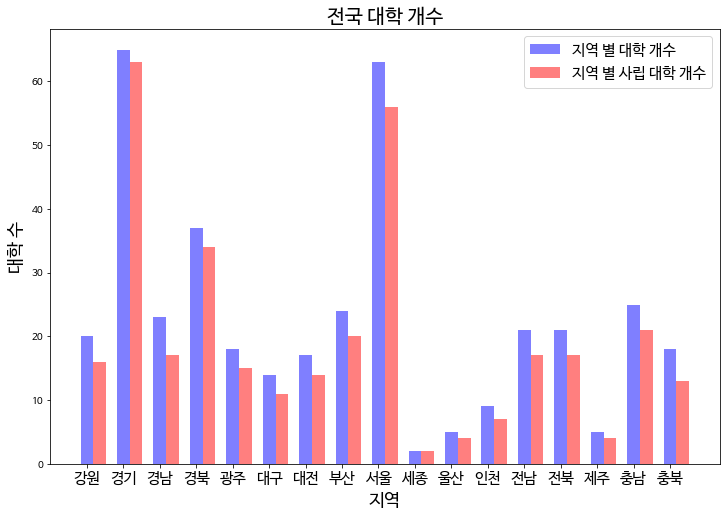

In [294]:
# 각 지역 별 대학 개수 비교 그래프

plt.figure(figsize=(12,8))

bar_width = 0.35
alpha = 0.5

x_label = list(count.keys())
x_value = len(x_label)
index = np.arange(x_value)

x_list = list(sorted(count.keys()))

y1 = []
y2 = []

for i in x_list:
    y1.append(count[i])
    y2.append(drop_count[i])



p1 = plt.bar(index, y1, 

             bar_width, 

             color='b', 

             alpha=alpha,

             label='지역 별 대학 개수')



p2 = plt.bar(index+bar_width, y2, 

             bar_width, 

             color='r', 

             alpha=alpha,

             label='지역 별 사립 대학 개수')



plt.title('전국 대학 개수', fontsize=20)

plt.ylabel('대학 수', fontsize=18)

plt.xlabel('지역', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('지역 별 대학 개수', '지역 별 사립 대학 개수'), fontsize=15)

plt.show()

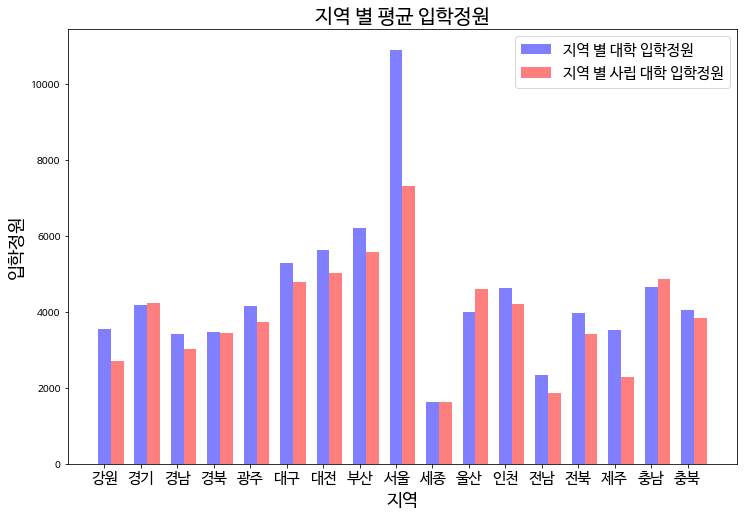

In [295]:
# 각 지역 별 평균 입학정원 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5

x_label = list(count.keys())
x_value = len(x_label)
index = np.arange(x_value)

x_list = list(sorted(count.keys()))
y1 = df_avg.groupby("지역별")["입학정원 합(명)"].mean()
y2 = df_avg_drop.groupby(["지역별"])["입학정원 합(명)"].mean()



p1 = plt.bar(index, y1, 

             bar_width, 

             color='b', 

             alpha=alpha,

             label='지역 별 입학정원')



p2 = plt.bar(index+bar_width, y2, 

             bar_width, 

             color='r', 

             alpha=alpha,

             label='지역 별 사립 대학 입학정원')



plt.title('지역 별 평균 입학정원', fontsize=20)

plt.ylabel('입학정원', fontsize=18)

plt.xlabel('지역', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('지역 별 대학 입학정원', '지역 별 사립 대학 입학정원'), fontsize=15)


plt.show()

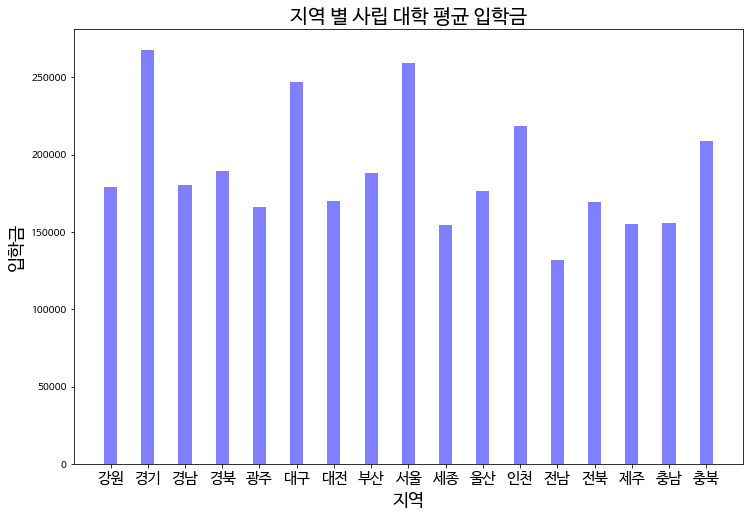

In [296]:
# 각 지역별 평균 입학금 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5

x_label = list(count.keys())
x_value = len(x_label)
index = np.arange(x_value)

x_list = list(sorted(count.keys()))
y = df_avg_drop.groupby(["지역별"])["평균입학금(원)"].mean()

plt.bar(index, y, 

        bar_width, 

        color='b', 

        alpha=alpha,

        label='지역 별 사립 대학 입학금')



plt.title('지역 별 사립 대학 평균 입학금', fontsize=20)

plt.ylabel('입학금', fontsize=18)

plt.xlabel('지역', fontsize=18)

plt.xticks(index, x_list, fontsize=15)


plt.show()

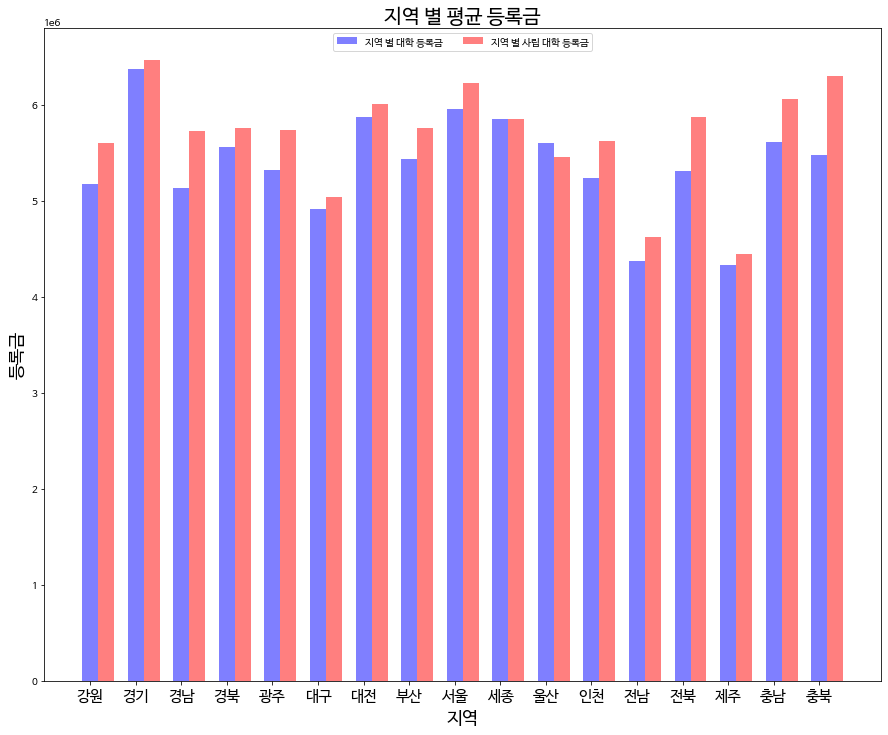

In [297]:
# 각 지역별 평균 등록금 비교 그래프

plt.figure(figsize=(15,12))

bar_width = 0.35
alpha = 0.5

x_label = list(count.keys())
x_value = len(x_label)
index = np.arange(x_value)

x_list = list(sorted(count.keys()))

y1 = []
y2 = []

y1_re = []
y2_re = []

for i in range(x_value):
    y1_list = df_avg.groupby(["지역별"])["평균등록금(원)"].mean()
    y1.append(y1_list[i])

    y2_list = df_avg_drop.groupby(["지역별"])["평균등록금(원)"].mean()
    y2.append(y2_list[i])

for i in range(len(y1)):
    y1_re.append(round(y1[i]))
    y2_re.append(round(y2[i]))

p1 = plt.bar(index, y1_re, 

             bar_width, 

             color='b',

             alpha=alpha,

             label='지역 별 대학 등록금')



p2 = plt.bar(index+bar_width, y2_re, 

             bar_width, 

             color='r',
             
             alpha=alpha,

             label='지역 별 사립 대학 등록금')



plt.title('지역 별 평균 등록금', fontsize=20)

plt.ylabel('등록금', fontsize=18)

plt.xlabel('지역', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1))

plt.show()

 <br/>

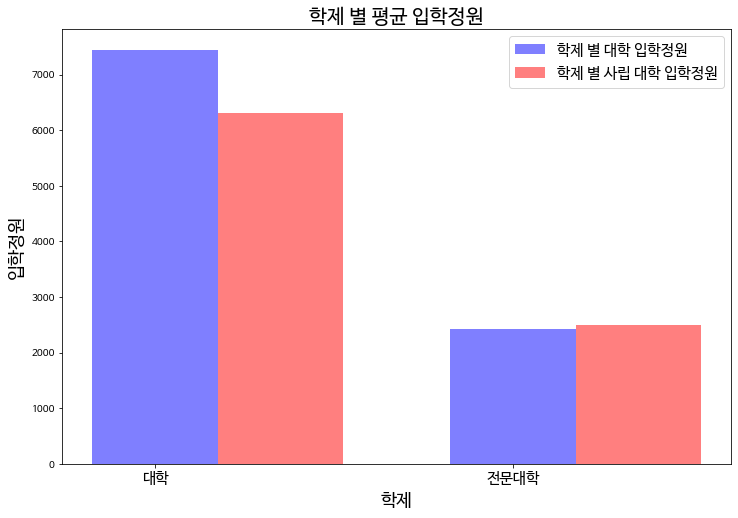

In [298]:
# 학제 별 입학정원 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['대학', '전문대학']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))
y1 = df_avg.groupby(["학제별"])["입학정원 합(명)"].mean()
y2 = df_avg_drop.groupby(["학제별"])["입학정원 합(명)"].mean()


p1 = plt.bar(index, y1, 

             bar_width, 

             color='b', 

             alpha=alpha,

             label='학제 별 입학정원')



p2 = plt.bar(index+bar_width, y2, 

             bar_width, 

             color='r', 

             alpha=alpha,

             label='학제 별 사립 대학 입학정원')



plt.title('학제 별 평균 입학정원', fontsize=20)

plt.ylabel('입학정원', fontsize=18)

plt.xlabel('학제', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('학제 별 대학 입학정원', '학제 별 사립 대학 입학정원'), fontsize=15)


plt.show()

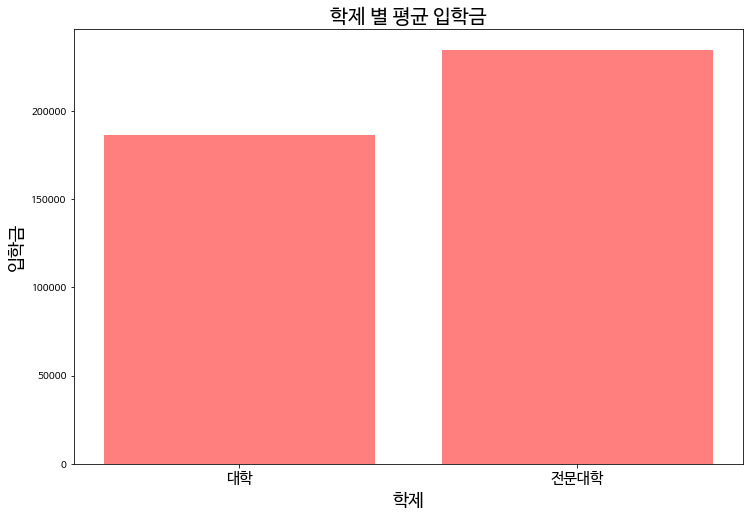

In [299]:
# 학제 별 평균 입학금 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['대학', '전문대학']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))
y = df_avg_drop.groupby(["학제별"])["평균입학금(원)"].mean()



plt.bar(index, y,  

        color='r',

        alpha=alpha,

        label='학제 별 사립 대학 입학금')



plt.title('학제 별 평균 입학금', fontsize=20)

plt.ylabel('입학금', fontsize=18)

plt.xlabel('학제', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.show()

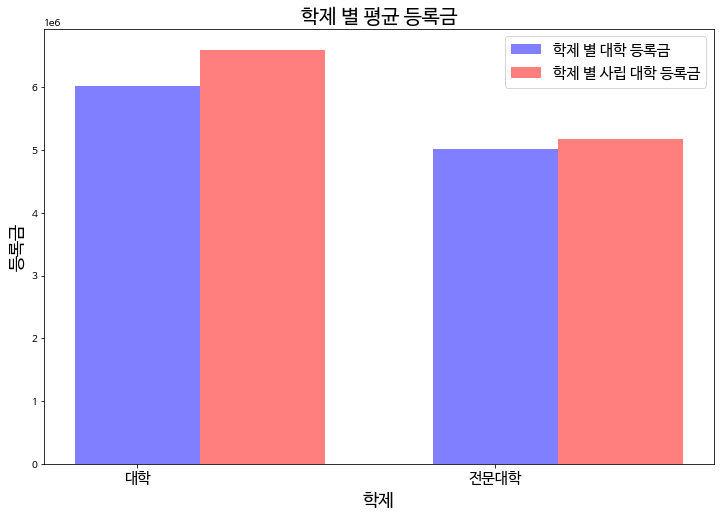

In [300]:
# 학제 별 평균 등록금 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['대학', '전문대학']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))

y1 = []
y2 = []

y1_re = []
y2_re = []

for i in range(x_value):
    y1_list = df_avg.groupby(["학제별"])["평균등록금(원)"].mean()
    y1.append(y1_list[i])

    y2_list = df_avg_drop.groupby(["학제별"])["평균등록금(원)"].mean()
    y2.append(y2_list[i])

for i in range(len(y1)):
    y1_re.append(round(y1[i]))
    y2_re.append(round(y2[i]))


p1 = plt.bar(index, y1, 

             bar_width, 

             color='b', 

             alpha=alpha,

             label='학제 별 등록금')



p2 = plt.bar(index+bar_width, y2, 

             bar_width, 

             color='r', 

             alpha=alpha,

             label='학제 별 사립 대학 등록금')



plt.title('학제 별 평균 등록금', fontsize=20)

plt.ylabel('등록금', fontsize=18)

plt.xlabel('학제', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('학제 별 대학 등록금', '학제 별 사립 대학 등록금'), fontsize=15)


plt.show()

 <br/>

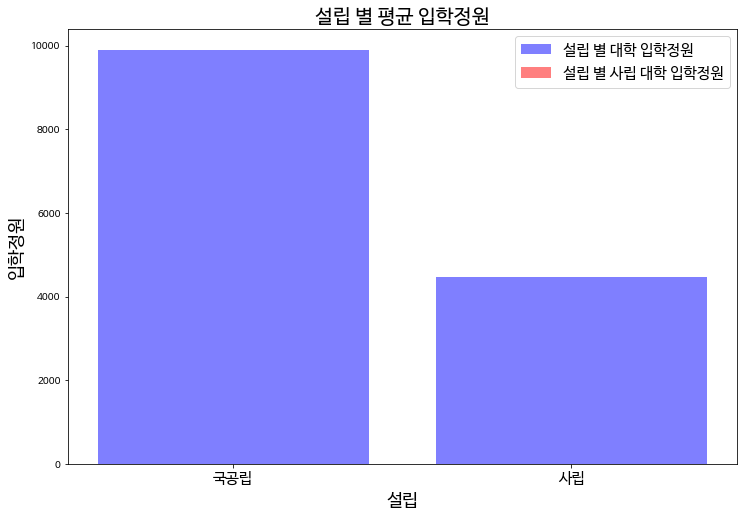

In [301]:
# 설립 별 입학정원 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['국공립', '사립']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))
y = df_avg.groupby(["설립별"])["입학정원 합(명)"].mean()



plt.bar(index, y, 

        color='b', 

        alpha=alpha,

        label='설립 별 입학정원')



plt.title('설립 별 평균 입학정원', fontsize=20)

plt.ylabel('입학정원', fontsize=18)

plt.xlabel('설립', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('설립 별 대학 입학정원', '설립 별 사립 대학 입학정원'), fontsize=15)


plt.show()

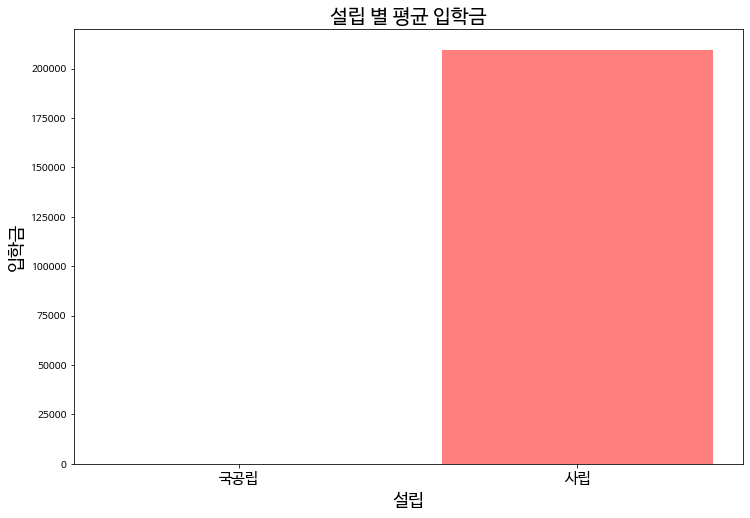

In [302]:
# 설립 별 평균 입학금 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['국공립', '사립']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))
y = df_avg.groupby(["설립별"])["평균입학금(원)"].mean()



plt.bar(index, y, 

        color='r', 

        alpha=alpha,

        label='설립 별 사립 대학 입학금')



plt.title('설립 별 평균 입학금', fontsize=20)

plt.ylabel('입학금', fontsize=18)

plt.xlabel('설립', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.show()

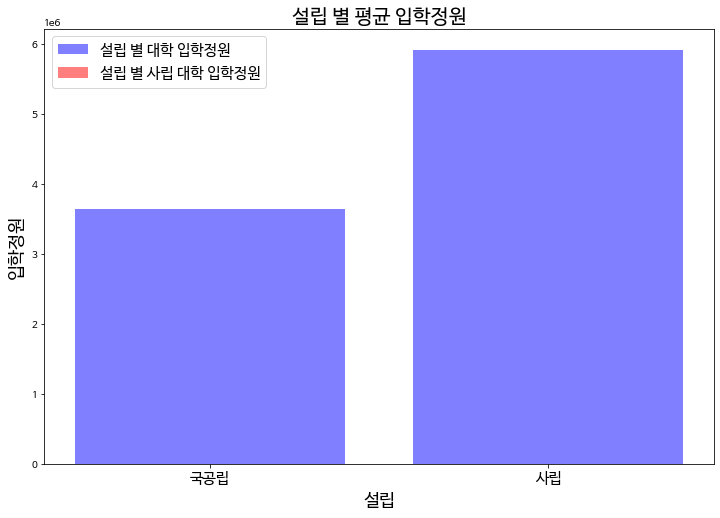

In [303]:
# 설립 별 평균 등록금 비교 그래프
# 설립 별 입학정원 비교 그래프

plt.figure(figsize=(12,8))

alpha = 0.5
bar_width = 0.35

x = ['국공립', '사립']

x_value = len(x)
index = np.arange(x_value)

x_list = list(sorted(x))

y = []

y_re = []

for i in range(x_value):
    y_list = df_avg.groupby(["설립별"])["평균등록금(원)"].mean()
    y.append(y_list[i])

for i in range(len(y)):
    y_re.append(round(y[i]))



plt.bar(index, y_re, 

        color='b', 

        alpha=alpha,

        label='설립 별 입학정원')



plt.title('설립 별 평균 입학정원', fontsize=20)

plt.ylabel('입학정원', fontsize=18)

plt.xlabel('설립', fontsize=18)

plt.xticks(index, x_list, fontsize=15)

plt.legend((p1[0], p2[0]), ('설립 별 대학 입학정원', '설립 별 사립 대학 입학정원'), fontsize=15)


plt.show()